In [6]:
!head -10 ../data/president_heights.csv
import numpy as np

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189
4,James Madison,163
5,James Monroe,183
6,John Quincy Adams,171
7,Andrew Jackson,185
8,Martin Van Buren,168
9,William Henry Harrison,173


We'll use the Pandas package, which we'll explore more fully in [Chapter 3](03.00-Introduction-to-Pandas.ipynb), to read the file and extract this information (note that the heights are measured in centimeters).

In [8]:
import pandas as pd
data = pd.read_csv('../data/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [13]:
#possiamo ripetere l'operazione per altre colonne
names = np.array(data['name'])
print(names)

['George Washington' 'John Adams' 'Thomas Jefferson' 'James Madison'
 'James Monroe' 'John Quincy Adams' 'Andrew Jackson' 'Martin Van Buren'
 'William Henry Harrison' 'John Tyler' 'James K. Polk' 'Zachary Taylor'
 'Millard Fillmore' 'Franklin Pierce' 'James Buchanan' 'Abraham Lincoln'
 'Andrew Johnson' 'Ulysses S. Grant' 'Rutherford B. Hayes'
 'James A. Garfield' 'Chester A. Arthur' 'Benjamin Harrison'
 'William McKinley' 'Theodore Roosevelt' 'William Howard Taft'
 'Woodrow Wilson' 'Warren G. Harding' 'Calvin Coolidge' 'Herbert Hoover'
 'Franklin D. Roosevelt' 'Harry S. Truman' 'Dwight D. Eisenhower'
 'John F. Kennedy' 'Lyndon B. Johnson' 'Richard Nixon' 'Gerald Ford'
 'Jimmy Carter' 'Ronald Reagan' 'George H. W. Bush' 'Bill Clinton'
 'George W. Bush' 'Barack Obama']


Now that we have this data array, we can compute a variety of summary statistics:

In [14]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


Note that in each case, the aggregation operation reduced the entire array to a single summarizing value, which gives us information about the distribution of values.
We may also wish to compute quantiles:

In [ ]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


In [47]:
#vediamo ora come filtrare righe di un dataframe pandas usando la funzione loc()
#Esempio 1: selezioniamo righe in base al valore 
print("Obama:\n", data.loc[data['name'] == 'Barack Obama'],"\n")

#Esempio 2: operatori booleani
print("Obama e Reagan:\n", data.loc[(data['name'] == 'Barack Obama') | (data['name'] == 'Ronald Reagan')], "\n")

#Esempio 3: operatori logici
print("Più alti di 180cm.:\n", data.loc[data['height(cm)'] > 180], "\n")

print("I Roosevelt:\n", data.loc[data['name'].str.contains('Roosevelt')], "\n")

print("I Roosevelt e i John:\n", 
      data.loc[data['name'].str.contains('Roosevelt') | 
               data['name'].str.contains('John')], "\n")

print("I Roosevelt e i John ma non Johnson:\n", 
      data.loc[data['name'].str.contains('Roosevelt') | 
               (data['name'].str.contains('John') & 
                ~data['name'].str.contains('Johnson'))], "\n")

print("I Roosevelt e i Johnson ma non i John:\n", 
      data.loc[data['name'].str.contains('Roosevelt') | 
               (data['name'].str.contains('Johnson') & 
                ~data['name'].str.match('John'))], "\n")

Obama:
     order          name  height(cm)
41     44  Barack Obama         185 

Obama oppure Reagan:
     order           name  height(cm)
37     40  Ronald Reagan         185
41     44   Barack Obama         185 

Più alti di 180cm.:
     order                   name  height(cm)
0       1      George Washington         189
2       3       Thomas Jefferson         189
4       5           James Monroe         183
6       7         Andrew Jackson         185
9      10             John Tyler         183
14     15         James Buchanan         183
15     16        Abraham Lincoln         193
19     20      James A. Garfield         183
20     21      Chester A. Arthur         183
24     27    William Howard Taft         182
26     29      Warren G. Harding         183
28     31         Herbert Hoover         182
29     32  Franklin D. Roosevelt         188
32     35        John F. Kennedy         183
33     36      Lyndon B. Johnson         193
34     37          Richard Nixon         1

In [27]:
#Ora usiamo la funzione iloc() che usa l'indice di riga per filtrare
#Esempio 1: una riga specifica (ATTENZIONE: L'INDICE PARTE DA 0)
print("Riga di indice 10 :\n", data.iloc[10],"\n")
#Esempio 2: più righe, selezionate per indice
print("Prime 10 righe :\n", data.iloc[0:10],"\n")
print("Riga di indice 10 e di indice 15 :\n", data.iloc[[10,15]],"\n")
print("Righe dalla ventesima in poi :\n", data.iloc[19:],"\n")


Riga di indice 10 :
 order                    11
name          James K. Polk
height(cm)              173
Name: 10, dtype: object 

Prime 10 righe :
    order                    name  height(cm)
0      1       George Washington         189
1      2              John Adams         170
2      3        Thomas Jefferson         189
3      4           James Madison         163
4      5            James Monroe         183
5      6       John Quincy Adams         171
6      7          Andrew Jackson         185
7      8        Martin Van Buren         168
8      9  William Henry Harrison         173
9     10              John Tyler         183 

Riga di indice 10 e di indice 15 :
     order             name  height(cm)
10     11    James K. Polk         173
15     16  Abraham Lincoln         193 

Righe dalla ventesima in poi :
     order                   name  height(cm)
19     20      James A. Garfield         183
20     21      Chester A. Arthur         183
21     23      Benjamin Harrison

We see that the median height of US presidents is 182 cm, or just shy of six feet.

Of course, sometimes it's more useful to see a visual representation of this data, which we can accomplish using tools in Matplotlib (we'll discuss Matplotlib more fully in [Chapter 4](04.00-Introduction-To-Matplotlib.ipynb)). For example, this code generates the following chart:

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set(style="ticks", palette="bright")  # set plot style

plt.hist(heights, bins=20, histtype="step", orientation="horizontal")
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

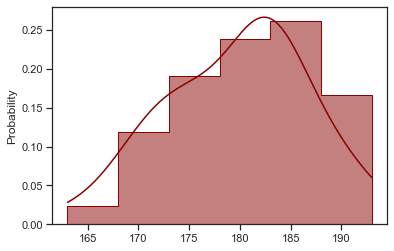

In [20]:
seaborn.histplot(data=heights, binwidth=5, stat="probability", color="darkred", kde="true", element=
                "step")
plt.show()

These aggregates are some of the fundamental pieces of exploratory data analysis that we'll explore in more depth in later chapters of the book.